<h1><center> Automating API Pull using Python </center></h1>

<h3 style="color:blue;"> (1) Import Python Libraries </h3>

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from time import time
from time import sleep

<h3 style="color:blue;"> (2) Using an API Key with Python </h3>

In [3]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}

headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0d11cefa-2730-441a-b86e-d5bc32d407d7',
}

In [4]:
session = Session()
session.headers.update(headers)

In [5]:
try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-08-18T07:38:54.184Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9580}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10392, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [6]:
type(data)

dict

<h3 style="color:blue;"> (3) API JSON format to Dataframe </h3>

In [7]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946078e+07,1.946078e+07,...,5.146881e+11,48.4365,5.553965e+11,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201776e+08,1.201776e+08,...,2.028549e+11,19.0870,2.028549e+11,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,59628,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284234e+10,8.668426e+10,...,8.282140e+10,7.7928,8.666235e+10,None,2023-08-18T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538522e+08,1.538522e+08,...,3.360766e+10,3.1622,3.360766e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,1032,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,...,2.684227e+10,2.5253,5.079735e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USD Coin,USDC,usd-coin,13653,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.625932e+10,2.625932e+10,...,2.626030e+10,2.4713,2.626030e+10,None,2023-08-18T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,2010,Cardano,ADA,cardano,892,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504801e+10,3.607655e+10,...,9.231225e+09,0.8687,1.185246e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN
7,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.072340e+08,5.551096e+08,...,8.983358e+09,0.8453,1.224541e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406366e+11,1.406366e+11,...,8.751267e+09,0.8236,8.751267e+09,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN
9,1958,TRON,TRX,tron,809,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, sec-security...",NaN,8.944250e+10,8.944252e+10,...,6.514204e+09,0.6130,6.514205e+09,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946078e+07,1.946078e+07,False,NaN,1,NaN,NaN,None,2023-08-18T07:37:00.000Z,26447.451621,3.402770e+10,107.7883,-0.374073,-7.492168,-9.997307,-11.973942,0.169592,-1.497174,5.146881e+11,48.4365,5.553965e+11,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201776e+08,1.201776e+08,True,NaN,2,NaN,NaN,None,2023-08-18T07:37:00.000Z,1687.959245,1.613777e+10,196.2745,-0.271539,-6.114886,-8.612241,-11.648347,-2.054703,-6.766717,2.028549e+11,19.0870,2.028549e+11,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
2,825,Tether USDt,USDT,tether,59628,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284234e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-18T07:37:00.000Z,0.999747,5.105706e+10,99.6217,-0.019201,0.101923,0.124063,-0.036558,0.007107,-0.053421,8.282140e+10,7.7928,8.666235e+10,None,2023-08-18T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-18 07:39:07.630322
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538522e+08,1.538522e+08,False,NaN,4,NaN,NaN,None,2023-08-18T07:37:00.000Z,218.441289,8.601419e+08,71.7160,-0.045527,-5.600681,-9.103695,-10.083541,-10.275284,-29.119702,3.360766e+10,3.1622,3.360766e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
4,52,XRP,XRP,xrp,1032,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-18T07:37:00.000Z,0.507973,3.048638e+09,103.2961,0.174283,-13.747933,-19.739130,-35.703282,3.341162,9.255211,2.684227e+10,2.5253,5.079735e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322


<h3 style="color:blue;"> (4) Automating the Data Pull </h3>

In [10]:
def api_runner():
    
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0d11cefa-2730-441a-b86e-d5bc32d407d7',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    # Use this if you want to create a csv and append data to it
    '''
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'D:\IITG\portfolio_projects\api_automation\API.csv'):
        df.to_csv(r'D:\IITG\portfolio_projects\api_automation\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\IITG\portfolio_projects\api_automation\API.csv', mode='a', header=False)
    '''

In [11]:
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [22]:
# Use this to read in the data from the created csv
# df72 = pd.read_csv(r'D:\IITG\portfolio_projects\api_automation\API.csv')
# df72

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946078e+07,1.946078e+07,False,NaN,1,NaN,NaN,None,2023-08-18T07:37:00.000Z,26447.451621,3.402770e+10,107.7883,-0.374073,-7.492168,-9.997307,-11.973942,0.169592,-1.497174,5.146881e+11,48.4365,5.553965e+11,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201776e+08,1.201776e+08,True,NaN,2,NaN,NaN,None,2023-08-18T07:37:00.000Z,1687.959245,1.613777e+10,196.2745,-0.271539,-6.114886,-8.612241,-11.648347,-2.054703,-6.766717,2.028549e+11,19.0870,2.028549e+11,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
2,825,Tether USDt,USDT,tether,59628,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284234e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-18T07:37:00.000Z,0.999747,5.105706e+10,99.6217,-0.019201,0.101923,0.124063,-0.036558,0.007107,-0.053421,8.282140e+10,7.7928,8.666235e+10,None,2023-08-18T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-18 07:39:07.630322
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538522e+08,1.538522e+08,False,NaN,4,NaN,NaN,None,2023-08-18T07:37:00.000Z,218.441289,8.601419e+08,71.7160,-0.045527,-5.600681,-9.103695,-10.083541,-10.275284,-29.119702,3.360766e+10,3.1622,3.360766e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
4,52,XRP,XRP,xrp,1032,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-18T07:37:00.000Z,0.507973,3.048638e+09,103.2961,0.174283,-13.747933,-19.739130,-35.703282,3.341162,9.255211,2.684227e+10,2.5253,5.079735e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
5,3408,USD Coin,USDC,usd-coin,13653,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.625932e+10,2.625932e+10,False,NaN,6,NaN,NaN,None,2023-08-18T07:37:00.000Z,1.000037,7.102969e+09,99.8259,-0.016849,0.011798,0.001769,0.009180,-0.004274,0.005886,2.626030e+10,2.4713,2.626030e+10,None,2023-08-18T07:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-18 07:39:07.630322
6,2010,Cardano,ADA,cardano,892,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504801e+10,3.607655e+10,False,NaN,7,NaN,NaN,None,2023-08-18T07:37:00.000Z,0.263388,4.123794e+08,64.1104,-0.240302,-4.678453,-11.116935,-16.969477,0.957723,-27.946636,9.231225e+09,0.8687,1.185246e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
7,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.072340e+08,5.551096e+08,True,NaN,8,NaN,NaN,None,2023-08-18T07:37:00.000Z,22.059448,6.551712e+08,52.4377,-0.291126,-5.065060,-10.025580,-16.377949,42.789642,9.317953,8.983358e+09,0.8453,1.224541e+10,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
8,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-excha

<h3 style="color:blue;"> (5) Transforming the Data </h3>

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19460781.00000,19460781.00000,False,NaN,1,NaN,NaN,None,2023-08-18T07:37:00.000Z,26447.45162,34027704064.32199,107.78830,-0.37407,-7.49217,-9.99731,-11.97394,0.16959,-1.49717,514688064012.95380,48.43650,555396484050.26001,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120177615.03373,120177615.03373,True,NaN,2,NaN,NaN,None,2023-08-18T07:37:00.000Z,1687.95924,16137765780.58016,196.27450,-0.27154,-6.11489,-8.61224,-11.64835,-2.05470,-6.76672,202854916281.38602,19.08700,202854916281.39001,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
2,825,Tether USDt,USDT,tether,59628,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82842337234.09930,86684257831.21764,True,NaN,3,NaN,NaN,None,2023-08-18T07:37:00.000Z,0.99975,51057058418.91830,99.62170,-0.01920,0.10192,0.12406,-0.03656,0.00711,-0.05342,82821402092.75977,7.79280,86662351795.61000,None,2023-08-18T07:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-18 07:39:07.630322
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153852157.56494,153852157.56494,False,NaN,4,NaN,NaN,None,2023-08-18T07:37:00.000Z,218.44129,860141930.88754,71.71600,-0.04553,-5.60068,-9.10369,-10.08354,-10.27528,-29.11970,33607663634.46523,3.16220,33607663634.47000,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322
4,52,XRP,XRP,xrp,1032,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52841868447.00000,99988501123.00000,False,NaN,5,NaN,NaN,None,2023-08-18T07:37:00.000Z,0.50797,3048638465.79890,103.29610,0.17428,-13.74793,-19.73913,-35.70328,3.34116,9.25521,26842267422.78557,2.52530,50797347277.20000,None,2023-08-18T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-18 07:39:07.630322


In [14]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.40364,-7.45195,-9.98055,-11.93245,0.17689,-1.48900
Ethereum,-0.30895,-6.05881,-8.56953,-11.58795,-2.02177,-6.74963
Tether USDt,-0.00984,0.10810,0.12654,-0.04080,0.01238,-0.05063
BNB,-0.05823,-5.53148,-9.03999,-10.01122,-10.19917,-29.07819
XRP,0.13087,-13.69195,-19.71165,-35.68696,3.39751,9.29168
USD Coin,-0.00073,0.01151,0.00512,0.00610,-0.00082,0.00787
Cardano,-0.21501,-4.56540,-11.00401,-16.84636,1.09312,-27.77821
Solana,-0.34285,-5.03644,-10.00891,-16.31701,42.83651,9.32966
Dogecoin,0.01707,-8.26741,-17.69884,-10.19283,0.36942,-15.23315


In [15]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.40364
             quote.USD.percent_change_24h    -7.45195
             quote.USD.percent_change_7d     -9.98055
             quote.USD.percent_change_30d   -11.93245
             quote.USD.percent_change_60d     0.17689
             quote.USD.percent_change_90d    -1.48900
Ethereum     quote.USD.percent_change_1h     -0.30895
             quote.USD.percent_change_24h    -6.05881
             quote.USD.percent_change_7d     -8.56953
             quote.USD.percent_change_30d   -11.58795
             quote.USD.percent_change_60d    -2.02177
             quote.USD.percent_change_90d    -6.74963
Tether USDt  quote.USD.percent_change_1h     -0.00984
             quote.USD.percent_change_24h     0.10810
             quote.USD.percent_change_7d      0.12654
             quote.USD.percent_change_30d    -0.04080
             quote.USD.percent_change_60d     0.01238
             quote.USD.percent_change_90

In [16]:
type(df3)

pandas.core.frame.DataFrame

In [17]:
type(df4)

pandas.core.series.Series

In [18]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.40364
            quote.USD.percent_change_24h  -7.45195
            quote.USD.percent_change_7d   -9.98055
            quote.USD.percent_change_30d -11.93245
            quote.USD.percent_change_60d   0.17689
            quote.USD.percent_change_90d  -1.48900
Ethereum    quote.USD.percent_change_1h   -0.30895
            quote.USD.percent_change_24h  -6.05881
            quote.USD.percent_change_7d   -8.56953
            quote.USD.percent_change_30d -11.58795
            quote.USD.percent_change_60d  -2.02177
            quote.USD.percent_change_90d  -6.74963
Tether USDt quote.USD.percent_change_1h   -0.00984
            quote.USD.percent_change_24h   0.10810
            quote.USD.percent_change_7d    0.12654
            quote.USD.percent_change_30d  -0.04080
            quote.USD.percent_change_60d   0.01238
            quote.USD.percent_change_90d  -0.05063
BNB         quote.USD.percent_change_1h   -0.05823
            quote.USD.percent_change_24h  -5.53148
            quote.USD.percent_change_7d   -9.03999
            quote.USD.percent_change_30d -10.01122
            quote.USD.percent_change_60d -10.19917
            quote.USD.percent_change_90d -29.07819
XRP         quote.USD.percent_change_1h    0.13087
            quote.USD.percent_change_24h -13.69195
            quote.USD.percent_change_7d  -19.71165
            quote.USD.percent_change_30d -35.68696
            quote.USD.percent_change_60d   3.39751
            quote.USD.percent_change_90d   9.29168
USD Coin    quote.USD.percent_change_1h   -0.00073
            quote.USD.percent_change_24h   0.01151
            quote.USD.percent_change_7d    0.00512
            quote.USD.percent_change_30d   0.00610
            quote.USD.percent_change_60d  -0.00082
            quote.USD.percent_change_90d   0.00787
Cardano     quote.USD.percent_change_1h   -0.21501
            quote.USD.percent_change_24h  -4.56540
            quote.USD.percent_change_7d  -11.00401
            quote.USD.percent_change_30d -16.84636
            quote.USD.percent_change_60d   1.09312
            quote.USD.percent_change_90d -27.77821
Solana      quote.USD.percent_change_1h   -0.34285
            quote.USD.percent_change_24h  -5.03644
            quote.USD.percent_change_7d  -10.00891
            quote.USD.percent_change_30d -16.31701
            quote.USD.percent_change_60d  42.83651
            quote.USD.percent_change_90d   9.32966
Dogecoin    quote.USD.percent_change_1h    0.01707
            quote.USD.percent_change_24h  -8.26741
            quote.USD.percent_change_7d  -17.69884
            quote.USD.percent_change_30d -10.19283
            quote.USD.percent_change_60d   0.36942
            quote.USD.percent_change_90d -15.23315
TRON        quote.USD.percent_change_1h    0.26655
            quote.USD.percent_change_24h  -2.41224
            quote.USD.percent_change_7d   -5.58609
            quote.USD.percent_change_30d  -8.80894
            quote.USD.percent_change_60d   4.20245
            quote.USD.percent_change_90d   2.88930
Polkadot    quote.USD.percent_change_1h    0.41150
            quote.USD.percent_change_24h  -5.08404
            quote.USD.percent_change_7d   -9.93047
            quote.USD.percent_change_30d -14.03743
            quote.USD.percent_change_60d  -0.93471
            quote.USD.percent_change_90d -16.18176
Polygon     quote.USD.percent_change_1h   -0.18483
            quote.USD.percent_change_24h  -6.23230
            quote.USD.percent_change_7d  -15.19025
            quote.USD.percent_change_30d -22.28879
            quote.USD.percent_change_60d  -2.99917
            quote.USD.percent_change_90d -32.90834
Dai         quote.USD.percent_change_1h   -0.10688
            quote.USD.percent_change_24h   0.00342
            quote.USD.percent_change_7d    0.02969
            quote.USD.percent_change_30d  -0.00472
            quote.USD.percent_change_60d  -0.00185
            quo

In [19]:
type(df5)

pandas.core.frame.DataFrame

In [20]:
df5.count()

values    90
dtype: int64

In [21]:
index = pd.Index(range(90))

In [22]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.40364
1,Bitcoin,quote.USD.percent_change_24h,-7.45195
2,Bitcoin,quote.USD.percent_change_7d,-9.98055
3,Bitcoin,quote.USD.percent_change_30d,-11.93245
4,Bitcoin,quote.USD.percent_change_60d,0.17689
5,Bitcoin,quote.USD.percent_change_90d,-1.48900
6,Ethereum,quote.USD.percent_change_1h,-0.30895
7,Ethereum,quote.USD.percent_change_24h,-6.05881
8,Ethereum,quote.USD.percent_change_7d,-8.56953
9,Ethereum,quote.USD.percent_change_30d,-11.58795


In [23]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.40364
1,Bitcoin,quote.USD.percent_change_24h,-7.45195
2,Bitcoin,quote.USD.percent_change_7d,-9.98055
3,Bitcoin,quote.USD.percent_change_30d,-11.93245
4,Bitcoin,quote.USD.percent_change_60d,0.17689
5,Bitcoin,quote.USD.percent_change_90d,-1.48900
6,Ethereum,quote.USD.percent_change_1h,-0.30895
7,Ethereum,quote.USD.percent_change_24h,-6.05881
8,Ethereum,quote.USD.percent_change_7d,-8.56953
9,Ethereum,quote.USD.percent_change_30d,-11.58795


In [24]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.40364
1,Bitcoin,24h,-7.45195
2,Bitcoin,7d,-9.98055
3,Bitcoin,30d,-11.93245
4,Bitcoin,60d,0.17689
5,Bitcoin,90d,-1.48900
6,Ethereum,1h,-0.30895
7,Ethereum,24h,-6.05881
8,Ethereum,7d,-8.56953
9,Ethereum,30d,-11.58795


<h3 style="color:blue;"> (6) Visualizing the Data </h3>

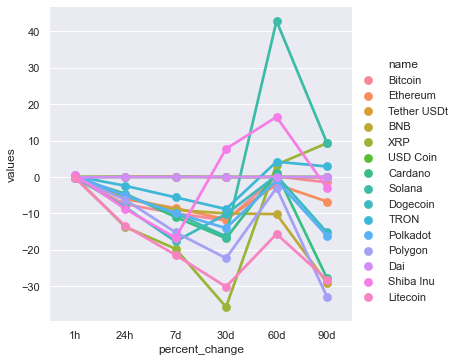

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [26]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,26447.45162,2023-08-18 07:39:07.630322
1,Ethereum,1687.95924,2023-08-18 07:39:07.630322
2,Tether USDt,0.99975,2023-08-18 07:39:07.630322
3,BNB,218.44129,2023-08-18 07:39:07.630322
4,XRP,0.50797,2023-08-18 07:39:07.630322
5,USD Coin,1.00004,2023-08-18 07:39:07.630322
6,Cardano,0.26339,2023-08-18 07:39:07.630322
7,Solana,22.05945,2023-08-18 07:39:07.630322
8,Dogecoin,0.06223,2023-08-18 07:39:07.630322
9,TRON,0.07283,2023-08-18 07:39:07.630322


In [27]:
df9 = df8.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,26447.45162,2023-08-18 07:39:07.630322
0,Bitcoin,26447.45162,2023-08-18 07:39:18.949811
0,Bitcoin,26443.69331,2023-08-18 07:40:20.355608
0,Bitcoin,26464.99743,2023-08-18 07:41:21.055115
0,Bitcoin,26464.66639,2023-08-18 07:42:22.258739
0,Bitcoin,26455.13874,2023-08-18 07:43:22.917310


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

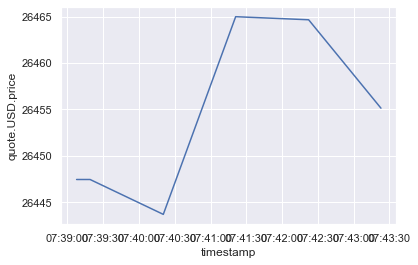

In [28]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)